### Importing Packages

In [1]:
import pandas as pd
import numpy as np
import time
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import tree
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost import XGBRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RepeatedKFold, GridSearchCV #for hyper parameter Tuning

import math


import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split #needed for spliting data into testing and training
from sklearn.preprocessing import StandardScaler
#from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error #For calculating MSE

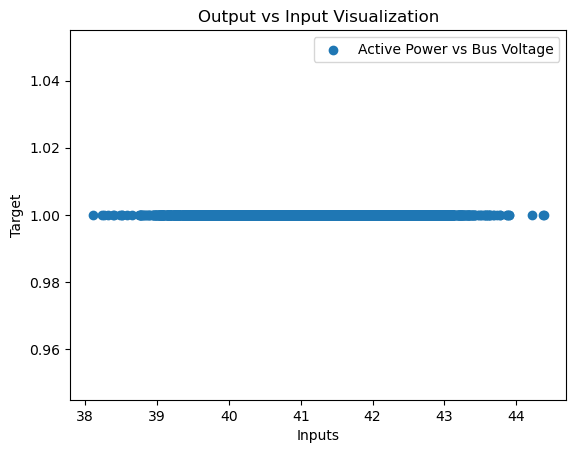

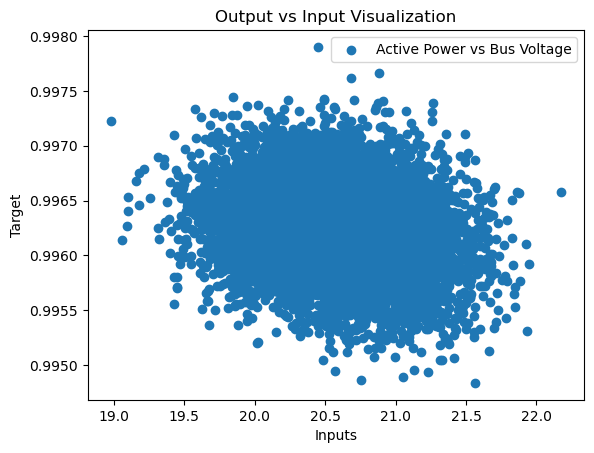

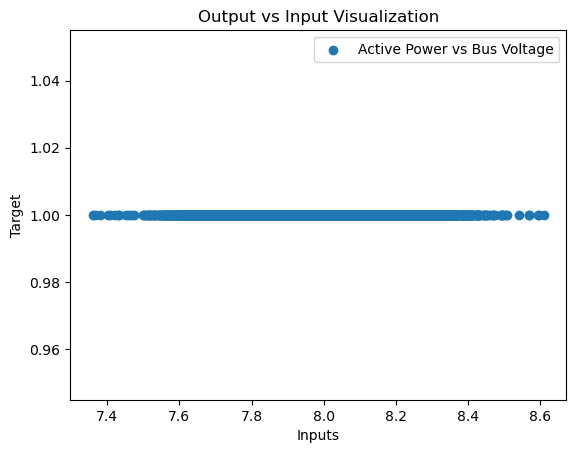

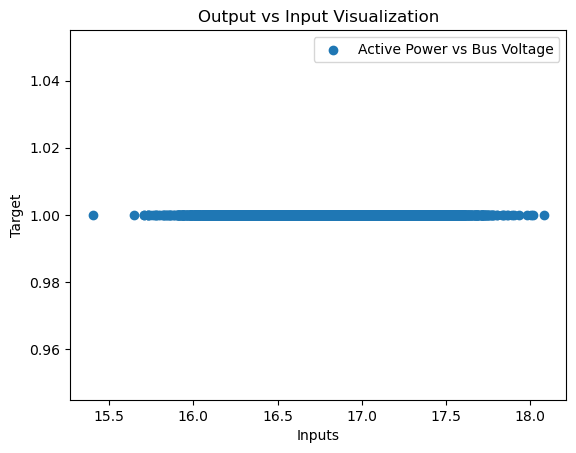

In [18]:
df=pd.read_csv(r'D:\Notebook\result_df.csv') #Input and target data
df.drop(columns = "Unnamed: 0",inplace=True)
data=np.array(df)
X=data[:,1:20001] #Now X only has 10000 data indexing from 0 to 10000
y=data[:,20001:30001]

for i in range(0,4):
    plt.scatter(X[i, :10000], y[i,:], label='Active Power vs Bus Voltage')
    #plt.scatter(X[:, 10000:20000], y, label='Reactive Power vs Bus Voltage')
    plt.xlabel('Inputs')
    plt.ylabel('Target')
    plt.legend()
    plt.title('Output vs Input Visualization')
    plt.show()




In [10]:
df.iloc[:, 1:2001].head()

,training_data_1,training_data_2,training_data_3,training_data_4,training_data_5,training_data_6,training_data_7,training_data_8,training_data_9,training_data_10,...,training_data_1991,training_data_1992,training_data_1993,training_data_1994,training_data_1995,training_data_1996,training_data_1997,training_data_1998,training_data_1999,training_data_2000
0,42.416747,39.221868,41.115663,41.547839,42.073534,40.148710,39.725576,40.983629,41.216060,39.710492,...,39.898579,40.520274,41.396413,40.828083,40.625137,41.619493,40.727733,41.433524,41.462380,42.205920
1,21.362095,21.617460,21.017770,20.462775,19.804725,19.752755,21.667779,21.089065,20.749477,20.339949,...,20.401993,20.540436,20.564712,20.996933,20.281362,20.682758,21.297647,21.259424,20.201999,20.681776
2,8.007281,7.900370,7.857780,7.874911,8.008240,7.990013,7.872064,7.922177,8.037867,7.925774,...,7.888827,7.895746,7.857539,7.859502,8.053744,7.983858,8.142076,8.287046,8.042127,8.031254
3,17.149074,16.129788,16.863076,17.120800,17.269256,16.196198,16.553872,16.424181,16.482640,17.135803,...,16.879976,16.236468,16.677109,16.941216,16.385194,16.185138,16.399157,16.589863,16.669914,16.297821
4,2.627481,2.734143,2.626526,2.685381,2.690046,2.675313,2.620379,2.709808,2.608866,2.647495,...,2.588913,2.687806,2.607148,2.673821,2.679278,2.632404,2.700474,2.596121,2.666159,2.705945


## Importing Datas and visualizing inputs

ValueError: x and y must be the same size

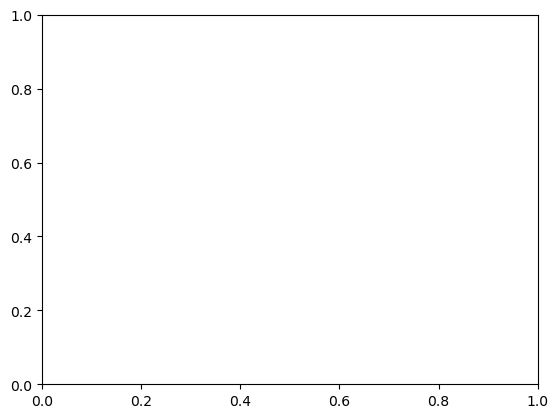

In [4]:
df=pd.read_csv(r'D:\Notebook\result_df.csv') #Input and target data
df.drop(columns = "Unnamed: 0",inplace=True)
data=np.array(df)
X=data[:,2:20003]
y=data[:,20003:]


# Scatter plot of the inputs vs target
plt.scatter(X[:, 2:10003], y, label='Active Poewr vs Bus Voltage')
plt.scatter(X[:, 20003:], y, label='Reactive Power vs Bus Voltage')
plt.xlabel('Inputs')
plt.ylabel('Target')
plt.legend()
plt.title('Output vs Input Visualization')
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.2)
#print("Train data are:")
#print(X_train)
#print(y_train)

#Normalizing the Input
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Defining Models

In [5]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Training Time
    t = time.process_time()
    model.fit(X_train, y_train)
    training_time = time.process_time() - t
    print(f"Training Time: {training_time:.5f} seconds")

    # Training MSE and RMSE
    y_train_pred = model.predict(X_train)
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = math.sqrt(mse_train)
    print(f"Training MSE: {mse_train:.5f}")
    print(f"Training RMSE: {rmse_train:.5f}")

    # Training MAPE
    mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
    print(f"Training MAPE: {mape_train:.5f}%")

    # Testing Time
    start_time_test = time.process_time()
    y_test_pred = model.predict(X_test)
    testing_time = time.process_time() - start_time_test
    print(f"Testing Time: {testing_time:.5f} seconds")

    # Testing RMSE
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = math.sqrt(mse_test)
    print(f"Testing RMSE: {rmse_test:.5f}")

    # Testing MAPE
    mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
    print(f"Testing MAPE: {mape_test:.5f}%")

    # Display Actual vs Predicted values (optional)
    print("\nActual Values:")
    print(y_test)
    print("Predicted Values:")
    print(y_test_pred)
    
    # Plot predicted vs actual values
    plt.scatter(y_test, y_test_pred, color='blue', label='Predicted vs Actual')
    #plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Ideal line
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Predicted vs Actual Values')
    plt.legend()
    plt.show()
    
    
    
   
        f.write(f"Training Time: {training_time:.5f} seconds\n")

        # Training MSE and RMSE
        y_train_pred = model.predict(X_train)
        mse_train = mean_squared_error(y_train, y_train_pred)
        rmse_train = math.sqrt(mse_train)
        f.write(f"Training MSE: {mse_train:.5f}\n")
        f.write(f"Training RMSE: {rmse_train:.5f}\n")

        # Training MAPE
        mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
        f.write(f"Training MAPE: {mape_train:.5f}%\n")

        # Testing Time
        start_time_test = time.process_time()
        y_test_pred = model.predict(X_test)
        testing_time = time.process_time() - start_time_test
        f.write(f"Testing Time: {testing_time:.5f} seconds\n")

        # Testing RMSE
        mse_test = mean_squared_error(y_test, y_test_pred)
        rmse_test = math.sqrt(mse_test)
        f.write(f"Testing RMSE: {rmse_test:.5f}\n")

        # Testing MAPE
        mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
        f.write(f"Testing MAPE: {mape_test:.5f}%\n")

        # Optionally, write actual and predicted values (if needed)
        f.write("\nActual Values:\n")
        f.write(str(y_test) + "\n")
        f.write("Predicted Values:\n")
        f.write(str(y_test_pred) + "\n")


Evaluating Decision Tree Regressor:
Training Time: 0.57812 seconds
Training MSE: 0.00000
Training RMSE: 0.00000
Training MAPE: 0.00000%
Testing Time: 0.01562 seconds
Testing RMSE: 0.00103
Testing MAPE: 0.03196%

Actual Values:
[0.991652 0.995677 0.996133 ... 0.999946 0.999932 0.996993]
Predicted Values:
[0.991842 0.995525 0.995783 ... 0.999946 0.999932 0.996883]


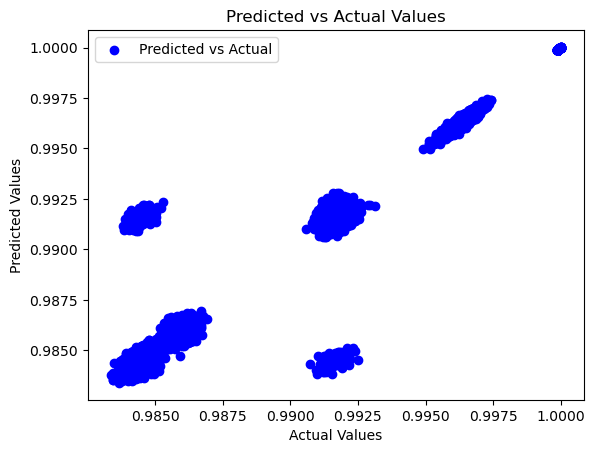

In [6]:
dt_model = DecisionTreeRegressor(random_state=12345)
print("\nEvaluating Decision Tree Regressor:")
evaluate_model(dt_model, X_train_scaled, y_train, X_test_scaled, y_test)